# Using pylj

## Overview

**Questions**
- What is pylj, and how do I use it?

**Objectives**
- Understand how to build a molecular dynamics simulation using pylj
- Gain a familiarity with the extensible `Sampling` classes of pylj

## pylj

pylj is an open-source tool for enabling interaction between students (the user of this tutorials) and molecular dynamics simulations. 
This software enables the simulation of argon atoms in a two-dimensional box. 
The code below runs a pylj simulation. 

<IPython.core.display.Javascript object>


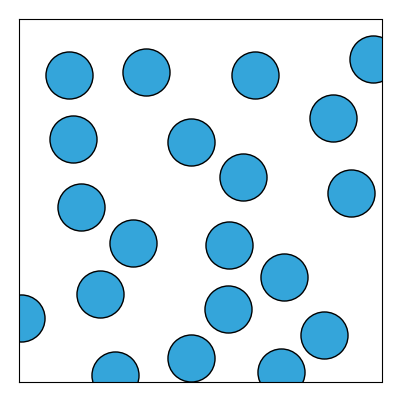

In [1]:
from pylj import md, sample

def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system
    system = md.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class
    sample_system = sample.JustCell(system)
    # Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # Run the equations of motion integrator algorithm, this 
        # includes the force calculation
        system.integrate(md.velocity_verlet)
        # Sample the thermodynamic and structural parameters of the system
        system.md_sample()
        # Allow the system to interact with a heat bath
        system.heat_bath(temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

system = md_simulation(20, 300, 20, 5000, 10)

The functionality of pylj that we will be using is the ability to add custom plots in addition to the particles in motion, as well as the storing of information about the particle positions.
This is can be observed with the code below for the instanteous temperature of the simulation being performed.

<IPython.core.display.Javascript object>


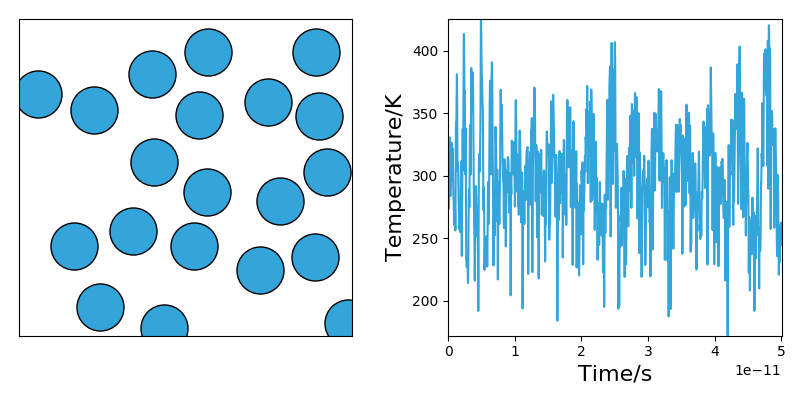

In [3]:
import numpy as np
from pylj import md, sample

def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    %matplotlib notebook
    system = md.initialise(number_of_particles, temperature, box_length, 'square')
    sample_system = sample.CellPlus(system, 'Time/s', 'Temperature/K')
    system.time = 0
    for i in range(0, number_of_steps):
        system.integrate(md.velocity_verlet)
        system.md_sample()
        system.heat_bath(temperature)
        system.time += system.timestep_length
        system.step += 1
        if system.step % sample_frequency == 0:
            sample_system.update(system, np.linspace(0, system.time, system.step), system.temperature_sample)
    return system

system = md_simulation(20, 300, 20, 5000, 10)

It can be seen that there are two differences to add the custom plot. 
Firstly, there is the use of the `sample.CellPlus` class, which requires the definition of the labels for the *x*- and *y*-axes of the plot. 
Secondly, there is the inclusion of the *x*- and *y*-data to be plotted in the `sample_system.update` line. 
In the above example these are `np.linspace(0, system.time, system.step)` (which is an array from 0 to the particular simulation timestep at that moment) and `system.temperature_sample` which is an array of the instaneous temperature at each timestep in the simulation. 

In the next episode we will take advantage of these features to better understand how to determine the scattering profile from the simulation cell. 

## Key points
- pylj is an open source Python for introducing classical simulation
- It is possible to build a molecular dynamics simulation with pylj
- The extensible nature of pylj allows custom data to be plotted alongside the simulation cell